In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
# Load dataset
file_path = "used_cars.csv"
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
df.shape

(4009, 12)

In [5]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [6]:
# prepare milage，remove "mi." and ","，and converted to float.
if 'milage' in df.columns:
    df['milage'] = df['milage'].str.replace(' mi.', '', regex=False)
    df['milage'] = df['milage'].str.replace(',', '', regex=False).astype(float)


In [7]:
# prepare price ，remove "$"，converted to float
if 'price' in df.columns:
    df['price'] = df['price'].str.replace('$', '', regex=False)
    df['price'] = df['price'].str.replace(',', '', regex=False).astype(float)


In [8]:
# handle clean_title，converted to binary (1: Yes, 0: No)
if 'clean_title' in df.columns:
    df['clean_title'] = df['clean_title'].map({'Yes': 1, 'No': 0, np.nan: 0})


In [9]:
# handle accident，converted to binary (1: accident, 0: no accident)
if 'accident' in df.columns:
    df['accident'] = df['accident'].apply(lambda x: 1 if x == "At least 1 accident or damage reported" else 0)


In [10]:
# handle fuel_type missing values，use "Unknown" to fill
if 'fuel_type' in df.columns:
    df['fuel_type'].fillna('Unknown', inplace=True)

/var/folders/f0/78_pz53j0h90w_47jd969ldm0000gn/T/ipykernel_63904/123552841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna('Unknown', inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   int64  
 10  clean_title   4009 non-null   int64  
 11  price         4009 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 376.0+ KB


In [12]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [13]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,1,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,0,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0,1,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,0,34999.0


In [14]:
df.duplicated().sum()

0

/var/folders/f0/78_pz53j0h90w_47jd969ldm0000gn/T/ipykernel_63904/3152662991.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='Set2',
/var/folders/f0/78_pz53j0h90w_47jd969ldm0000gn/T/ipykernel_63904/3152662991.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='Set2',
/var/folders/f0/78_pz53j0h90w_47jd969ldm0000gn/T/ipykernel_63904/3152662991.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='Set2',
/var/folders/f0/78_pz5

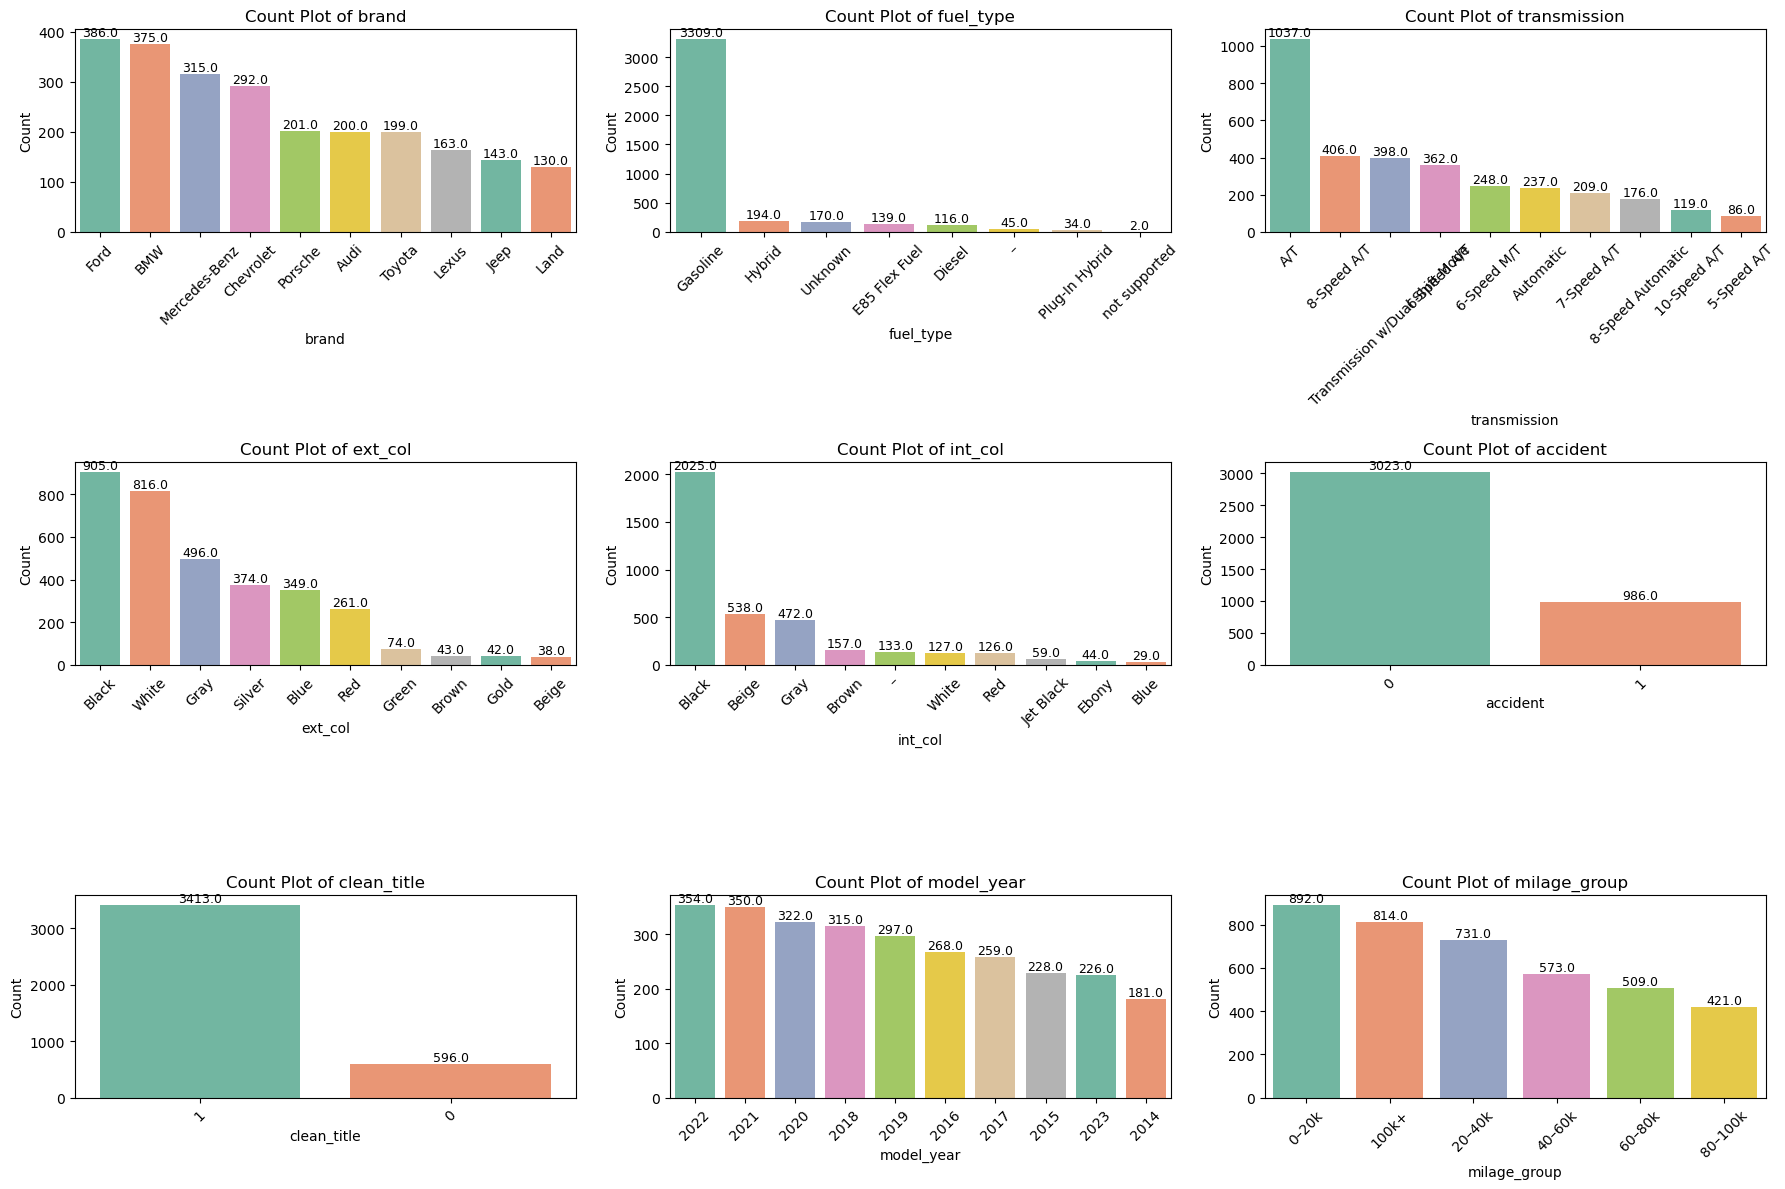

In [15]:
# Mileage group
df['milage_group'] = pd.cut(
    df['milage'],
    bins=[0, 20000, 40000, 60000, 80000, 100000, 200000],
    labels=['0–20k', '20–40k', '40–60k', '60–80k', '80–100k', '100k+']
)

# Nine features
cat_vars = [
    'brand', 'fuel_type', 'transmission',
    'ext_col', 'int_col', 'accident',
    'clean_title', 'model_year', 'milage_group'
]

# Plot
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(data=df, x=var, ax=axes[i], palette='Set2',
                  order=df[var].value_counts().index[:10])
    axes[i].set_title(f'Count Plot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

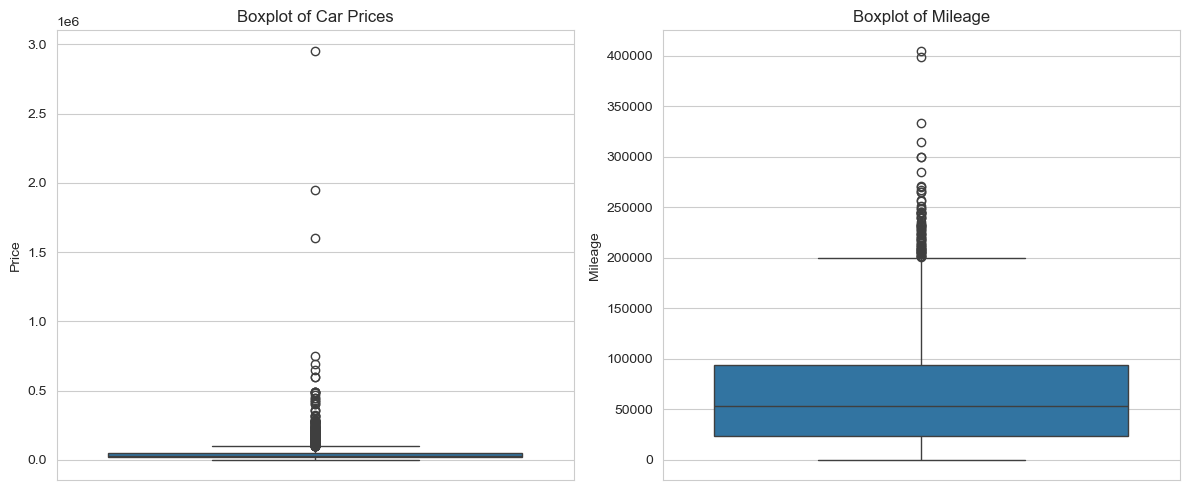

In [16]:
# check outlier from mileage and price
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# price box plot
sns.boxplot(y=df['price'], ax=axes[0])
axes[0].set_title('Boxplot of Car Prices')
axes[0].set_ylabel('Price')

# mileage box plot
sns.boxplot(y=df['milage'], ax=axes[1])
axes[1].set_title('Boxplot of Mileage')
axes[1].set_ylabel('Mileage')

plt.tight_layout()
plt.show()

In [17]:
# IQR check outlier
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# find outliers
outliers_price = detect_outliers_iqr(df, 'price')
outliers_milage = detect_outliers_iqr(df, 'milage')

In [18]:
outliers_price

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,milage_group
11,Aston,Martin DBS Superleggera,2019,22770.0,Gasoline,715.0HP 5.2L 12 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,0,1,184606.0,20–40k
16,Mercedes-Benz,Metris Base,2021,1685.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Gray,White,0,1,250000.0,0–20k
44,Lucid,Air Grand Touring,2022,3552.0,Unknown,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,0,1,119999.0,0–20k
61,Audi,R8 5.2 V10,2018,8940.0,Gasoline,5.2L V10 40V PDI DOHC,7-Speed Automatic with Auto-Shift,Tango Red Metallic,Black,0,0,144900.0,0–20k
71,Bentley,Continental GT W12,2017,14684.0,Gasoline,582.0HP 6.0L 12 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,White,0,1,130000.0,0–20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,Porsche,911 Carrera,2022,2950.0,Gasoline,379.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Black,0,1,131000.0,0–20k
3993,Porsche,911 Carrera S,2021,7008.0,Gasoline,443.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,0,0,151900.0,0–20k
3994,BMW,M8 Gran Coupe Competition,2022,21057.0,Gasoline,617.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Black,0,1,99800.0,20–40k
4002,Mercedes-Benz,AMG GLS 63 4MATIC,2023,2000.0,Hybrid,603.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,9-Speed A/T,Gray,Beige,0,1,175000.0,0–20k


In [19]:
outliers_milage

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,milage_group
7,BMW,740 iL,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,0,1,7300.0,NaN
31,Dodge,Ram 1500 Laramie Mega Cab,2006,300183.0,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,1,1,10900.0,NaN
89,Subaru,Forester 2.5 X,2004,210703.0,Gasoline,165.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,M/T,Green,Beige,0,0,2300.0,NaN
140,Dodge,Ram 2500 Laramie Quad Cab,2006,218000.0,Gasoline,330.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,0,1,12990.0,NaN
159,Toyota,Tacoma PreRunner,2008,202055.0,Gasoline,236.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,1,1,8500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,Ford,F-150 Lariat SuperCrew,2004,271000.0,Gasoline,300.0HP 5.4L 8 Cylinder Engine Gasoline Fuel,A/T,Red,Beige,1,1,9500.0,NaN
3757,Ford,F-250 XL Crew Cab Super Duty,2004,315000.0,Diesel,325.0HP 6.0L 8 Cylinder Engine Diesel Fuel,A/T,White,Gray,0,1,9200.0,NaN
3767,Ford,E350 Super Duty XLT,2010,248000.0,E85 Flex Fuel,255.0HP 5.4L 8 Cylinder Engine Flex Fuel Capab...,A/T,Silver,Beige,1,1,14000.0,NaN
3907,Toyota,Camry Solara SLE V6,2000,245000.0,Gasoline,200.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Beige,1,1,2500.0,NaN


In [20]:
# delete outlier
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_cleaned = remove_outliers_iqr(df, 'price')
df_cleaned = remove_outliers_iqr(df_cleaned, 'milage')

df_cleaned.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,milage_group
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1,10300.0,40–60k
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,1,38005.0,20–40k
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,0,54598.0,20–40k
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0,1,15500.0,80–100k
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,0,34999.0,0–20k
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,2.4 Liter,F,Silver,Ebony.,0,0,14798.0,100k+
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,0,1,31000.0,80–100k
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,0,1,41927.0,20–40k
9,Tesla,Model X Long Range Plus,2020,34000.0,Unknown,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,0,1,69950.0,20–40k
10,Land,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608.0,Gasoline,V6,Automatic,Fuji White,Pimento / Ebony,0,0,73897.0,20–40k


In [21]:
df_cleaned.shape

(3700, 13)

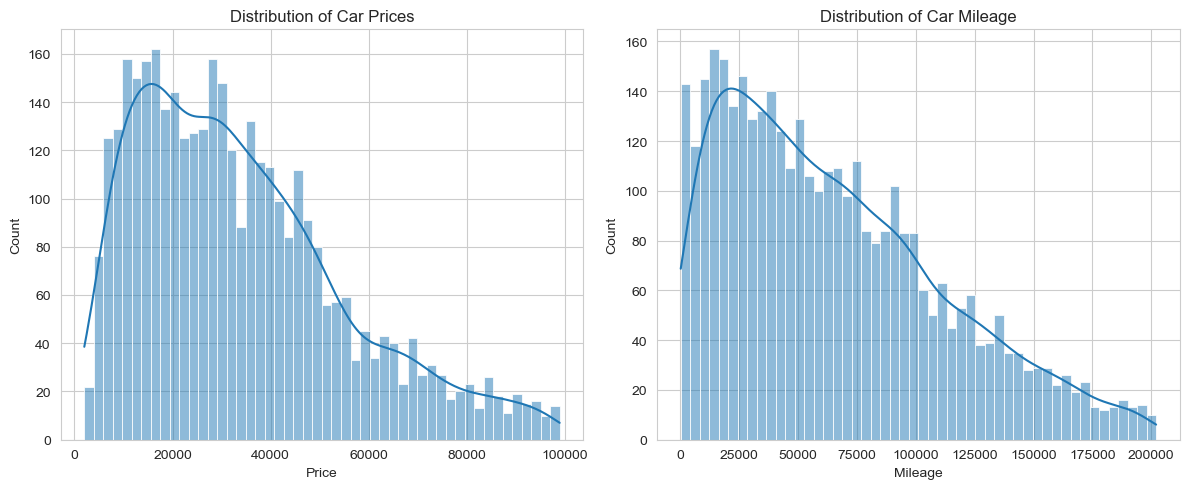

In [22]:
# draw bar plot for price and mileage
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# price bar plot
sns.histplot(df_cleaned['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Car Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Count')

# mileage bar plot
sns.histplot(df_cleaned['milage'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Car Mileage')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

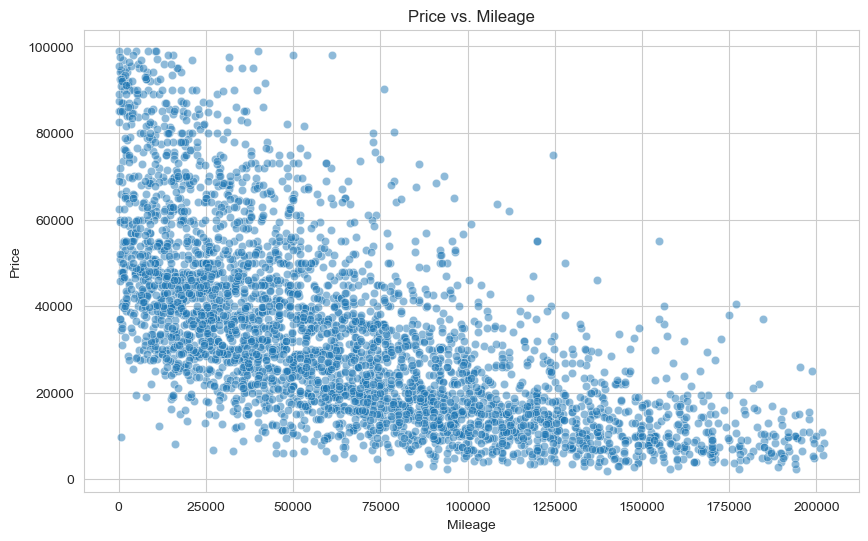

In [23]:
# price vs. mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['milage'], y=df_cleaned['price'], alpha=0.5)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

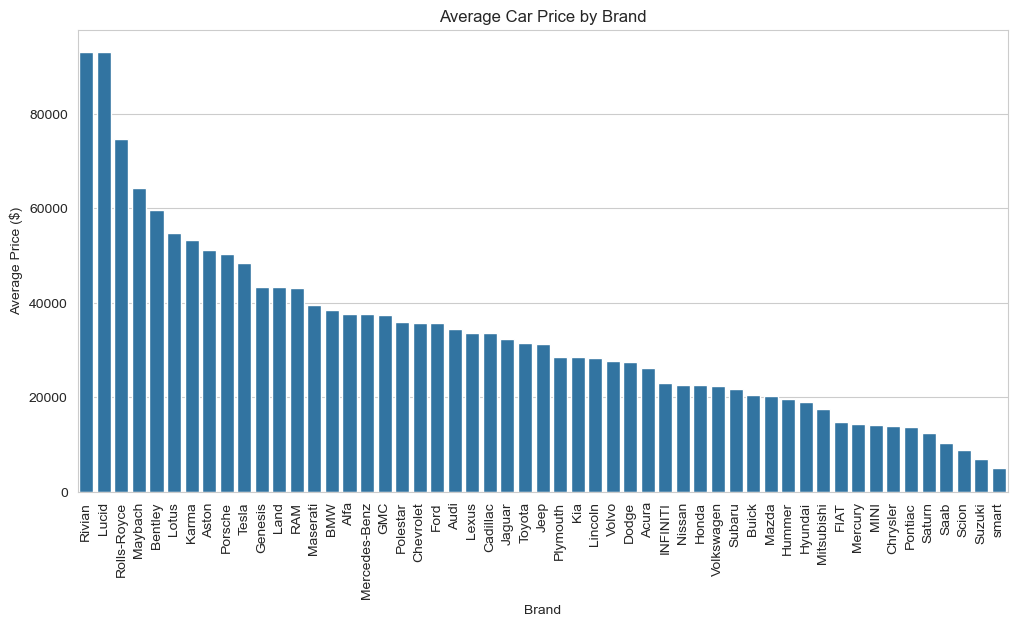

In [24]:
# compute every brand average price
brand_avg_price = df_cleaned.groupby('brand')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values)
plt.xticks(rotation=90)
plt.title('Average Car Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.show()

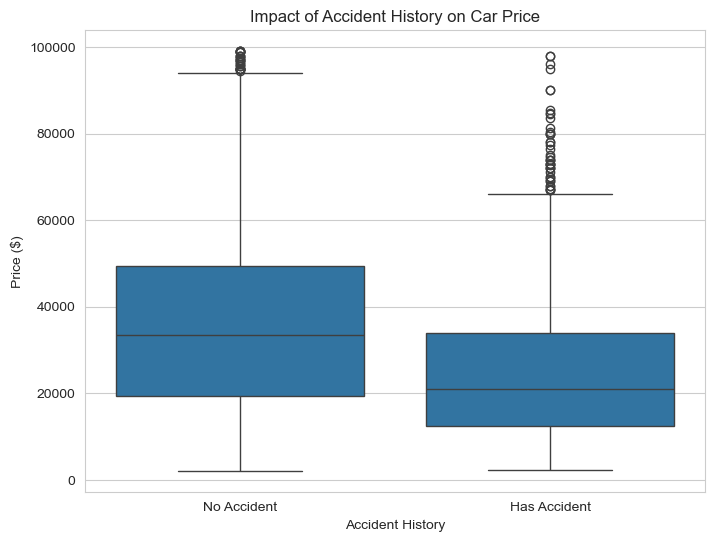

In [25]:
# accident vs. price
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['accident'], y=df_cleaned['price'])
plt.xticks([0, 1], ['No Accident', 'Has Accident'])
plt.title('Impact of Accident History on Car Price')
plt.xlabel('Accident History')
plt.ylabel('Price ($)')
plt.show()

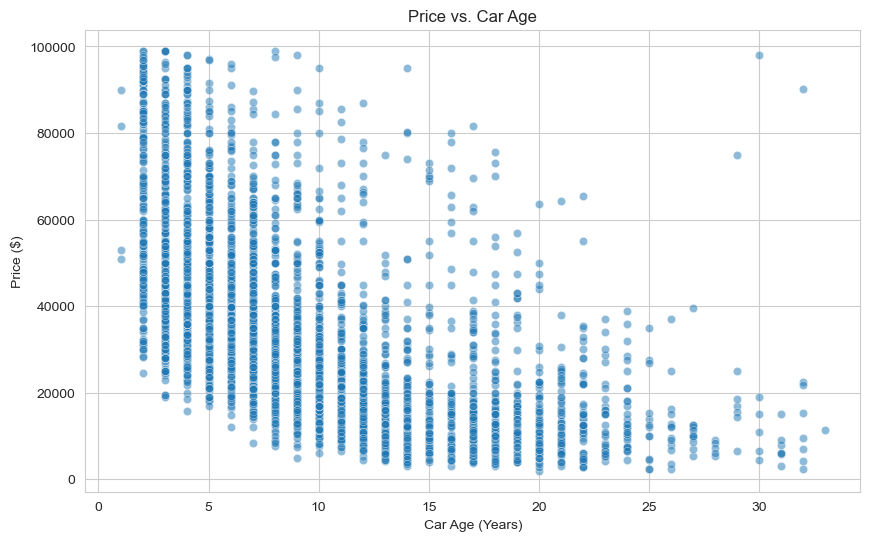

In [26]:
# calculate car age
df_cleaned['car_age'] = 2025 - df_cleaned['model_year']

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['car_age'], y=df_cleaned['price'], alpha=0.5)
plt.title('Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price ($)')
plt.show()

<Figure size 1200x600 with 0 Axes>

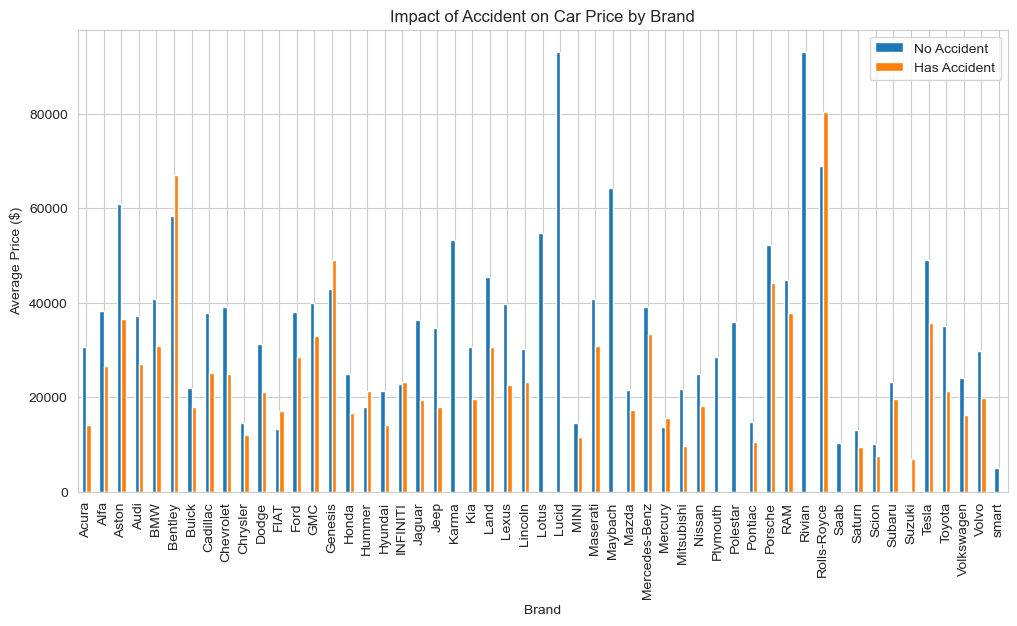

In [27]:
# Impact of accident on car price by Brand
brand_accident_impact = df_cleaned.groupby(['brand', 'accident'])['price'].mean().unstack()

# Plot
plt.figure(figsize=(12, 6))
brand_accident_impact.plot(kind='bar', figsize=(12, 6))
plt.title('Impact of Accident on Car Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.legend(['No Accident', 'Has Accident'])
plt.show()

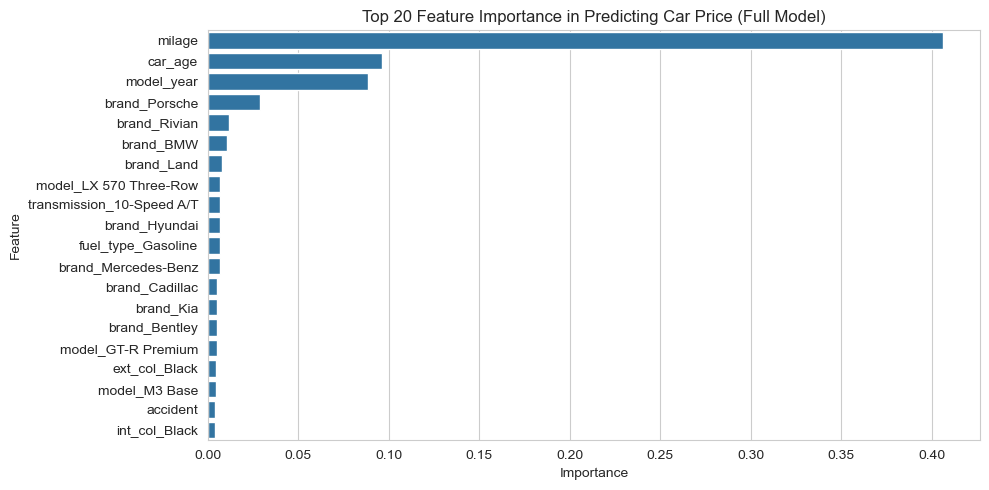

Top 100 Feature Model MAE: 9019.43


In [28]:
# Select features
features = ['model_year', 'car_age', 'milage', 'accident', 'clean_title', 
            'fuel_type', 'transmission', 'brand', 'model', 'ext_col', 'int_col']
target = 'price'

# # One-Hot Encoding
df_encoded_full = pd.get_dummies(df_cleaned[features], drop_first=True)
df_encoded_full = df_encoded_full.fillna(0)  

# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded_full, df_cleaned[target], test_size=0.2, random_state=42
)

# Initial model Random Forest
rf_model_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_full.fit(X_train, y_train)

# get the feature importance
feature_importance_full = pd.DataFrame({
    'Feature': df_encoded_full.columns,
    'Importance': rf_model_full.feature_importances_
}).sort_values(by='Importance', ascending=False)

# keep top100 features
top_100_features = feature_importance_full.head(100)['Feature'].tolist()
X_train_top100 = X_train[top_100_features]
X_test_top100 = X_test[top_100_features]

# use the top 100 features to train the model
rf_model_top100 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top100.fit(X_train_top100, y_train)

# visualize top20 features
plt.figure(figsize=(10, 5))
sns.barplot(
    x=feature_importance_full['Importance'][:20],
    y=feature_importance_full['Feature'][:20]
)
plt.title('Top 20 Feature Importance in Predicting Car Price (Full Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Evaluate the model
y_pred_top100 = rf_model_top100.predict(X_test_top100)
mae_top100 = mean_absolute_error(y_test, y_pred_top100)
print(f"Top 100 Feature Model MAE: {mae_top100:.2f}")



# Improvement phase

In [29]:
# Define features and target
features = ['model_year', 'milage', 'accident', 'clean_title', 
            'fuel_type', 'transmission', 'brand', 'model', 'ext_col', 'int_col']
target = 'price'

# Add calculated feature 'car_age'
df_cleaned['car_age'] = 2025 - df_cleaned['model_year']
features.append('car_age')

df_encoded = pd.get_dummies(df_cleaned[features], drop_first=True)
df_encoded = df_encoded.fillna(0)

# Ensure no null values
df_encoded = df_encoded.fillna(0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_cleaned[target], test_size=0.2, random_state=42)

# optimization for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, 
                                      n_iter=10, cv=3, verbose=1, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit model
rf_random_search.fit(X_train, y_train)

# Get best model
best_rf_model = rf_random_search.best_estimator_

# Predict
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(mae_rf)
print(mse_rf)
print(r2_rf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
8496.484250375674
141118955.7965249
0.6932922057072155


Fitting 3 folds for each of 10 candidates, totalling 30 fits
7097.31706114073
98528714.57754712
0.785857792441751


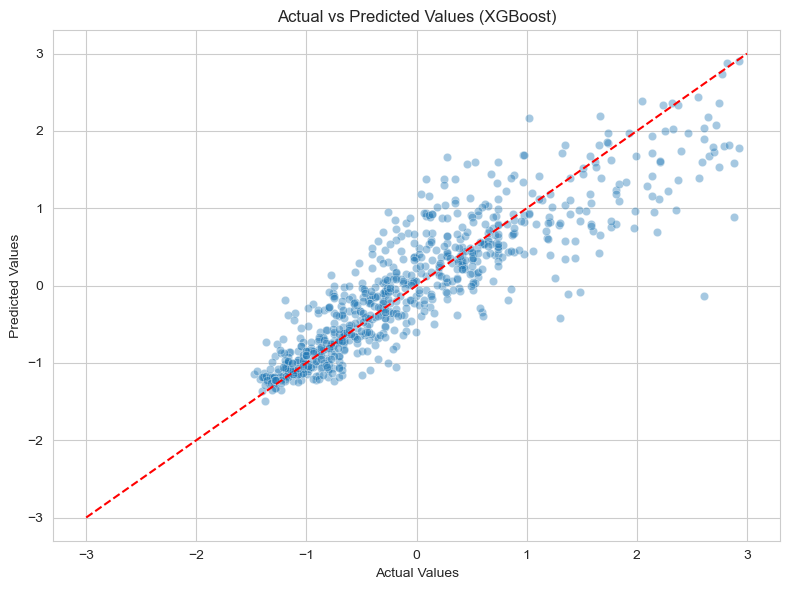

['features.pkl']

In [30]:
from xgboost import XGBRegressor

# XGBoost Optimization
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize model
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

# Perform RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, 
                                       n_iter=10, cv=3, verbose=1, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit model
xgb_random_search.fit(X_train, y_train)

# Get best model
best_xgb_model = xgb_random_search.best_estimator_

# Predict
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(mae_xgb)
print(mse_xgb)
print(r2_xgb)

scaler = StandardScaler()
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_scaled = scaler.transform(y_pred_xgb.reshape(-1, 1)).flatten()  

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_scaled, y=y_pred_scaled, alpha=0.4)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')  

plt.title('Actual vs Predicted Values (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, 'features.pkl')

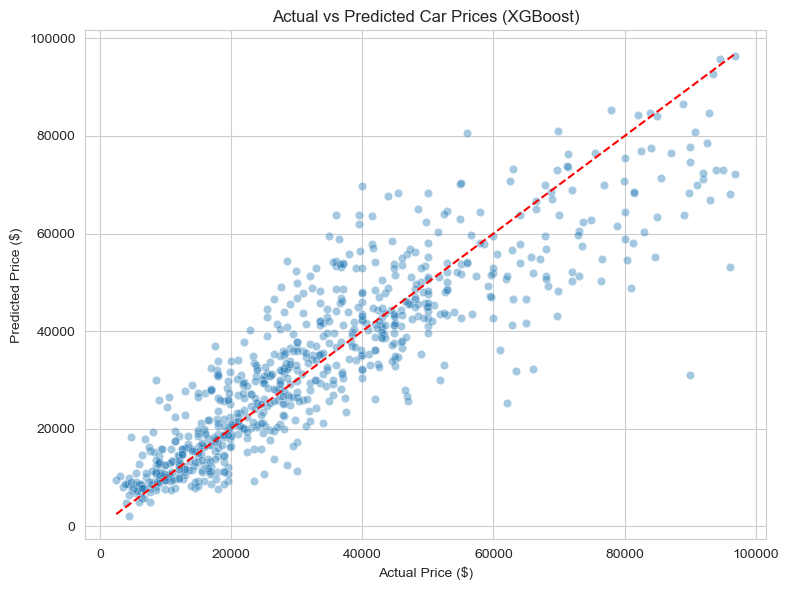

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.title('Actual vs Predicted Car Prices (XGBoost)')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# XGBoost for top 100 features
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, 
                                       n_iter=10, cv=3, verbose=1, n_jobs=-1, scoring='neg_mean_absolute_error')
xgb_random_search.fit(X_train_top100, y_train)
best_xgb_model = xgb_random_search.best_estimator_

# Evaluate XGBoost
y_pred_xgb = best_xgb_model.predict(X_test_top100)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost (Top 100 Features):")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"R² : {r2_xgb:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

XGBoost (Top 100 Features):
MAE: 8250.26
MSE: 128295367.26
R² : 0.7212


price_1y == MAE: $6751.32, MAPE: 29.32%, R²: 0.7401
price_2y == MAE: $5559.91, MAPE: 29.32%, R²: 0.7401
price_3y == MAE: $4765.64, MAPE: 29.32%, R²: 0.7401
price_4y == MAE: $3971.37, MAPE: 29.32%, R²: 0.7401
price_5y == MAE: $3177.09, MAPE: 29.32%, R²: 0.7401


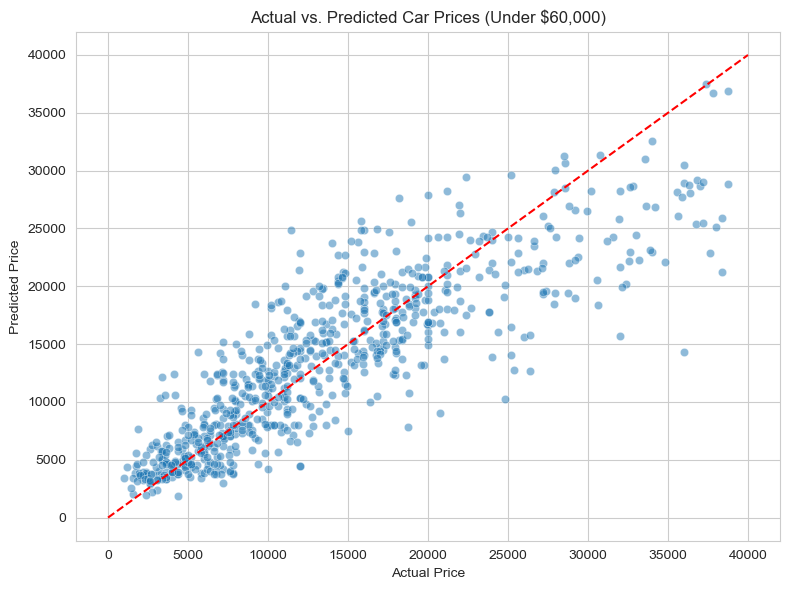

In [33]:
df_depreciation = df_cleaned.copy()

# Create depreciation targets
df_depreciation['price_1y'] = df_depreciation['price'] * 0.85
df_depreciation['price_2y'] = df_depreciation['price'] * 0.70
df_depreciation['price_3y'] = df_depreciation['price'] * 0.60
df_depreciation['price_4y'] = df_depreciation['price'] * 0.50
df_depreciation['price_5y'] = df_depreciation['price'] * 0.40

# Add car_age
df_depreciation['car_age'] = 2025 - df_depreciation['model_year']

# Features for training
features = ['model_year', 'milage', 'accident', 'clean_title', 
            'fuel_type', 'transmission', 'brand', 'model', 'ext_col', 'int_col', 'car_age']

# One-hot encode features
X_encoded = pd.get_dummies(df_depreciation[features], drop_first=True).fillna(0)

# Split for model training
X_train, X_test = train_test_split(X_encoded, test_size=0.2, random_state=42)

# Train depreciation models
results = []

for year in [1, 2, 3, 4, 5]:
    target = f'price_{year}y'
    y_train = df_depreciation.loc[X_train.index, target]
    y_test = df_depreciation.loc[X_test.index, target]

    model = XGBRegressor(objective="reg:squarederror", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results.append({
        "Target": target,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R²": round(r2, 4),
        "MAPE (%)": round(mape, 2)
    })
    joblib.dump(model, f'xgb_dep_{year}y.pkl')

# Print results
for r in results:
    print(f"{r['Target']} == MAE: ${r['MAE']}, MAPE: {r['MAPE (%)']}%, R²: {r['R²']}")
    
# Filter for prices under $100,000
filtered_indices = y_test < 40000
y_test_filtered = y_test[filtered_indices]
y_pred_filtered = pd.Series(y_pred, index=y_test.index)[filtered_indices]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_filtered, y=y_pred_filtered, alpha=0.5)
plt.plot([0, 40000], [0, 40000], color='red', linestyle='--')
plt.title('Actual vs. Predicted Car Prices (Under $60,000)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/f0/78_pz53j0h90w_47jd969ldm0000gn/T/ipykernel_63904/4231353943.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True)


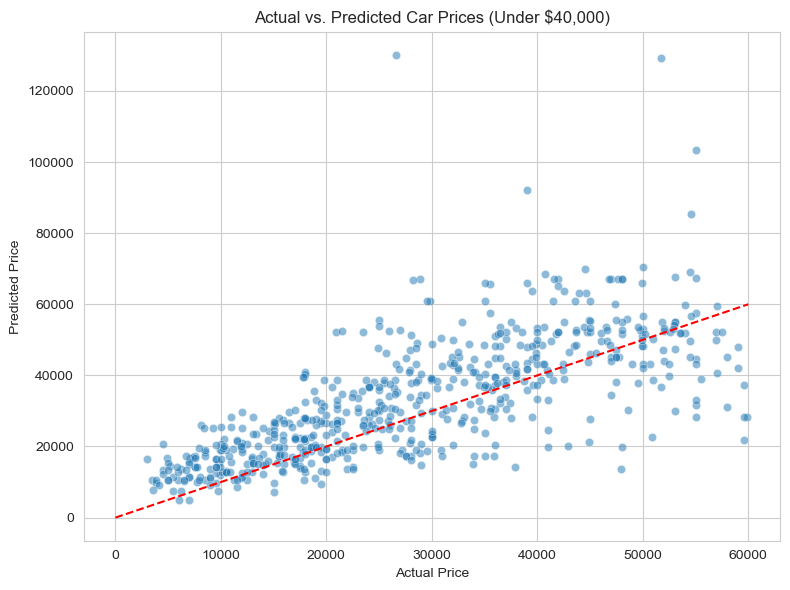

In [34]:
# Load and clean the data
df = pd.read_csv("used_cars.csv")
df['price'] = df['price'].replace('[\$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price', 'model_year'])

# Create car_age as of 2025
df['car_age'] = 2025 - df['model_year']

# Filter unrealistic car_age (e.g., < 0 or > 20)
df = df[(df['car_age'] >= 0) & (df['car_age'] <= 20)]

# Prepare features and target
features = ['car_age', 'milage', 'brand', 'fuel_type', 'transmission', 'clean_title', 'accident']
df_encoded = pd.get_dummies(df[features], drop_first=True).fillna(0)
target = df['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)

# Train XGBoost regression model
model = XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

# Filter for prices under $100,000
filtered_indices = y_test < 60000
y_test_filtered = y_test[filtered_indices]
y_pred_filtered = pd.Series(y_pred, index=y_test.index)[filtered_indices]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_filtered, y=y_pred_filtered, alpha=0.5)
plt.plot([0, 60000], [0, 60000], color='red', linestyle='--')
plt.title('Actual vs. Predicted Car Prices (Under $40,000)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()
